In [2]:
from skimage import color, io, util, filters, morphology
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import rescale

In [3]:
patrick = util.img_as_ubyte(color.rgb2gray(io.imread('./baby-patrick.jpg')))
oriImageFlatten = util.img_as_ubyte(patrick).flatten()


Histogram gambar original

Text(0.5, 1.0, 'Original')

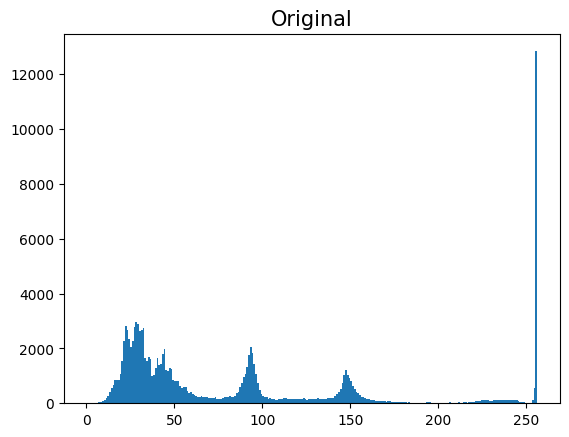

In [4]:
plt.hist(oriImageFlatten, 256, range=(0,256))
plt.title ('Original', fontsize =15)

1.a Tampilkan histogram citra tersebut dengan range intensitas 0 - 255. Lakukan image negative terhadap citra baby-patrick tersebut, kemudian tampilkan histogramnya.

Text(0.5, 1.0, 'Negative')

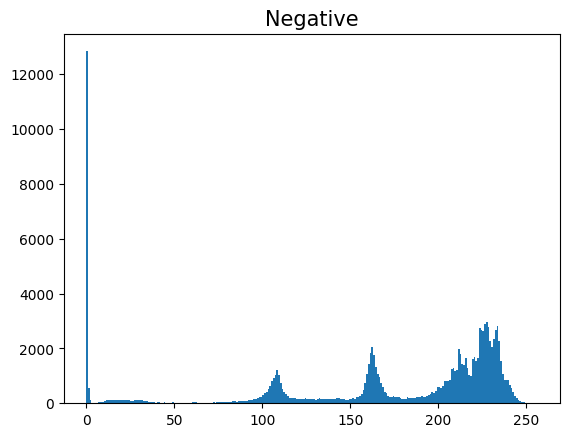

In [5]:
negImage = 255 - patrick
imgFlatten = util.img_as_ubyte(negImage).flatten()
plt.hist(imgFlatten, 256, range=(0,256))
plt.title ('Negative', fontsize =15)



1.b Tampilkan histogram citra tersebut dengan range intensitas 0 - 255. Lakukan log processing terhadap citra baby-patrick tersebut, kemudian tampilkan histogramnya.


Text(0.5, 1.0, 'Log Processing c = 0.7')

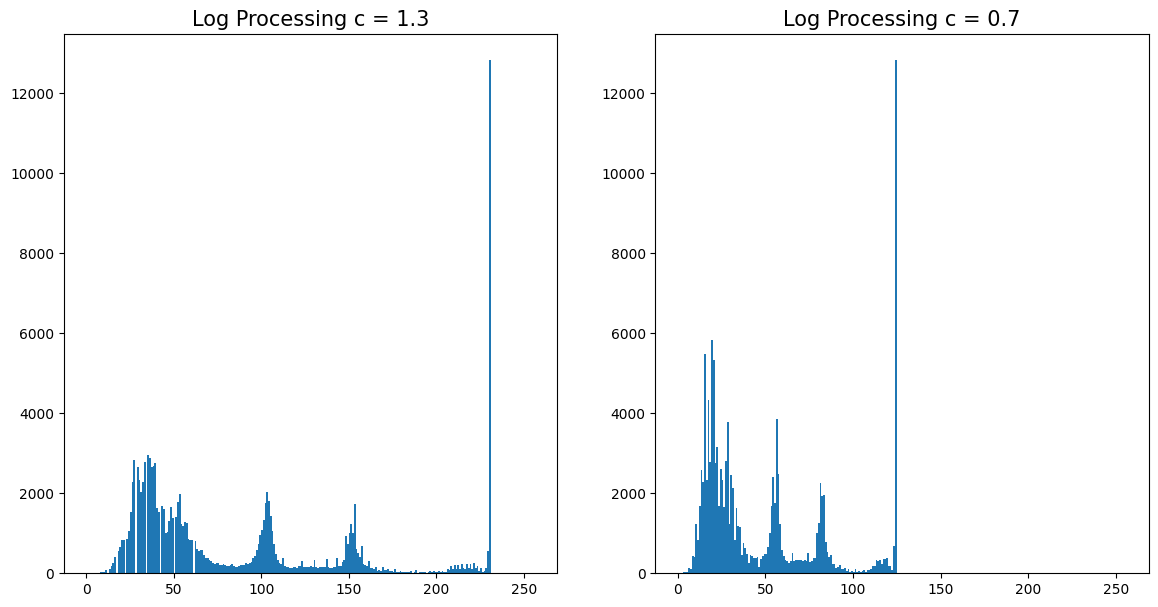

In [18]:
a = patrick / 255
c1 = 1.3
c2 = 0.7
logImage1 = c1 * np.log(1+(a))
logImage2 = c2 * np.log(1+(a))

imgFlatten1 = util.img_as_ubyte(logImage1).flatten()
imgFlatten2 = util.img_as_ubyte(logImage2).flatten()
plt.figure(figsize=(14,7))
plt.subplot(1,2,1); plt.hist(imgFlatten1, 256, range=(0,256))
plt.title ('Log Processing c = 1.3', fontsize =15)
plt.subplot(1,2,2); plt.hist(imgFlatten2, 256, range=(0,256))
plt.title ('Log Processing c = 0.7', fontsize =15)

1.c Tampilkan histogram citra tersebut dengan range intensitas 0 - 255. Lakukan gamma transformation terhadap citra baby-patrick tersebut, kemudian tampilkan histogramnya.

Text(0.5, 1.0, 'Gamma Transformation P = 1.4')

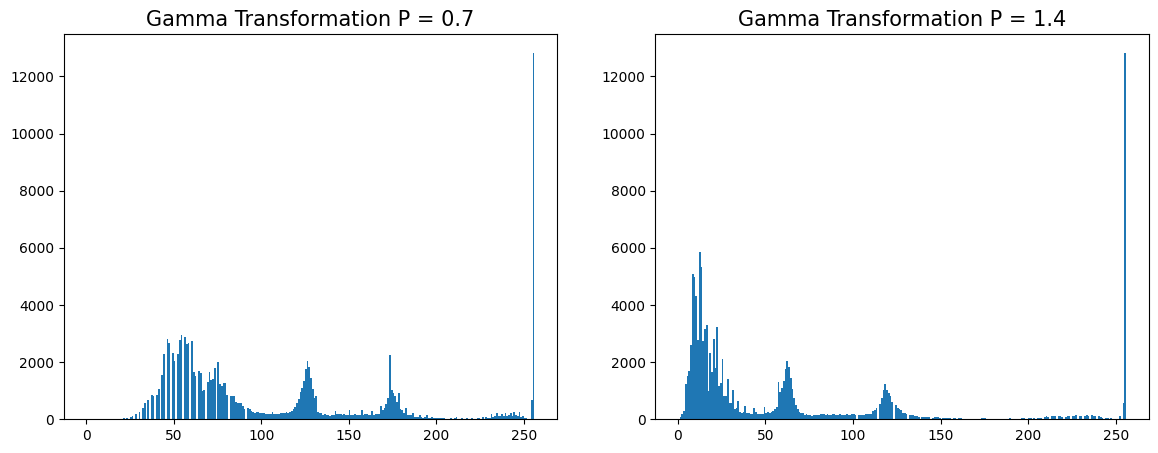

In [20]:
c = 1
p1 = 0.7
g1 = c * (a**p1)
p2 = 1.4
g2 = c * (a**p2)

gammaImgFlatten1 = util.img_as_ubyte(g1).flatten()
gammaImgFlatten2 = util.img_as_ubyte(g2).flatten()
plt.figure(figsize=(14,5))
plt.subplot(1,2,1); plt.hist(gammaImgFlatten1, 256, range=(0,256))
plt.title ('Gamma Transformation P = 0.7', fontsize =15)
plt.subplot(1,2,2); plt.hist(gammaImgFlatten2, 256, range=(0,256))
plt.title ('Gamma Transformation P = 1.4', fontsize =15)

1.d Jelaskan perbedaan yang Anda dapatkan dari ketiga metode tersebut, image negative, log processing, gamma transformation, utamanya dari segi karakteristik histogramnya.

Perbandingan ketiga metode di atas berdasarkan karakterisitik histogram yang dihasilkan:
- Metode negative image: Metode ini menghasilkan grafik histogram yang membalik letak dari piksel terang ke piksel gelap seperti dicerminkan. Namun untuk tinggi rendah nilai dari masing-masing piksel tidak berubah, yang berubah hanya letaknya saja. Karakteristik membalik intensitas piksel pada gambar ini dapat dimanfaatkan untuk memperjelas detail untuk gambar yang terlalu terang atau terlalu gelap
- Metode log processing: Metode ini menghasilkan grafik yang dapat meningkatkan detail dari sebuah gambar yang memiliki range piksel yang dinamis dan luas. Dengan menerapkan operasi log maka range intensitas piksel gambar akan dipersempit untuk untuk memberikan detail yang lebih jelas dan kemudian dapat diatur dengan memainkan nilai konstanta (c) seusai dengan range intensitas piksel yang diinginkan. 
- Metode gamma transformation: metode ini berguna untuk memainkan pencahayaan untuk sebuah gambar. Pencahayaan pada gambar dapat diatur dengan memainkan intensisitas dengan nilai rendah pada gambar. Hal tersebut dapat diatur dengan mengganti nilai konstanta (P), dimana kita dapat membuat gambar lebih cerah dengan memberikan nilai P < 1 dan membuat gambar lebih gelap dengan memberikan nilai P > 1. Semakin jauh nilai konstanta dari P maka gambar yang dihasilkan akan semakin cerah atau semakin gelap.

2.a  Ubah citra menjadi gray, lalu terapkan edge segmentation menggunakan prewitt, roberts, dan sobel.

Text(0.5, 1.0, 'Metode Sobel')

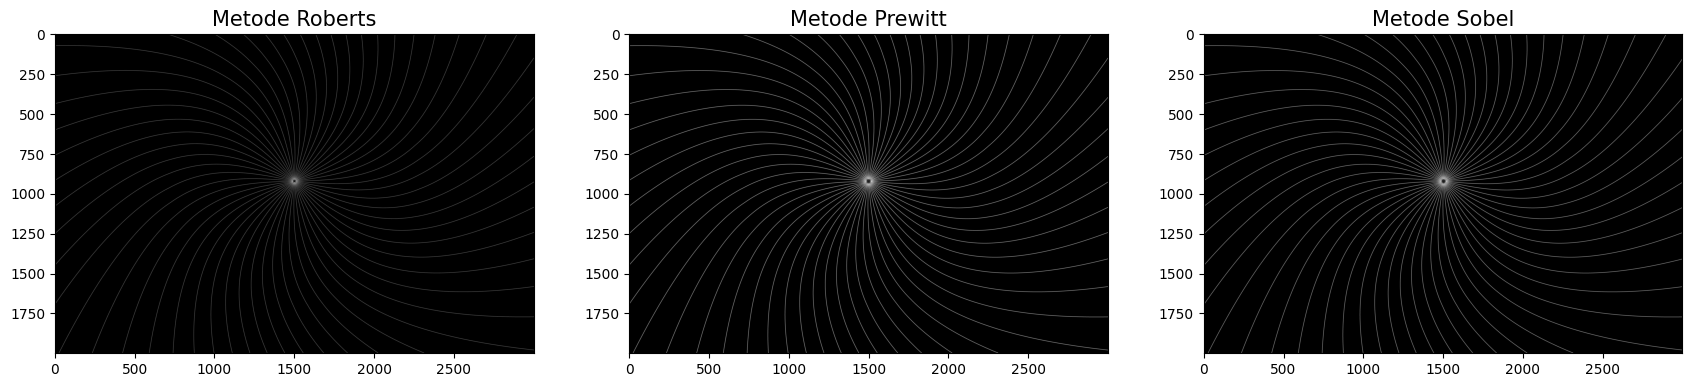

In [8]:
spiral = io.imread('./spiral.jpg')
graySpiral = color.rgb2gray(spiral)
spiral_robert = util.img_as_ubyte(filters.roberts(graySpiral))
spiral_prewitt = util.img_as_ubyte(filters.prewitt(graySpiral))
spiral_sobel = util.img_as_ubyte(filters.sobel(graySpiral))

plt.figure(figsize=(21,14))

plt.subplot(1,3,1); plt.imshow(spiral_robert, cmap='gray')
plt.title ('Metode Roberts', fontsize =15)
plt.subplot(1,3,2); plt.imshow(spiral_prewitt, cmap='gray')
plt.title ('Metode Prewitt', fontsize =15)
plt.subplot(1,3,3); plt.imshow(spiral_sobel, cmap='gray')
plt.title ('Metode Sobel', fontsize =15)


2.b Apa perbedaan yang dihasilkan oleh masing-masing edge detection?

Edge detection yang dihasilkan oleh metode roberts memberikan hasil guratan diagonal yang cukup jelas dan di bagian tengah gambar terdapat pencahayaan yang juga mampu dideteksi dengan disertai dengan detail garis yang berada di sekitar cahaya tersebut. Namun jika dibandingkan dengan gambar dari hasil metode prewitt dan sobel maka terlihat perbedaan dari segi guratan diagonal yang lebih tegas dan cahaya di bagian tengah yang cenderung lebih terang. Gambar yang dihasilkan oleh gambar prewitt dan sobel, meskipun terliaht serupa, namun detail guratan dan pencahayaan di bagian tengah masih disajikan lebih lembut oleh metode sobel ketika saya melakukan pengamatan dengan melakukan zoom-in pada gambar.

2.c Terapkan gaussian filtering dengan kernel (1, 1) dan (5, 5) pada citra spiral, lalu tampilkan hasilnya!

Text(0.5, 1.0, 'Guassian Filter sigma 1')

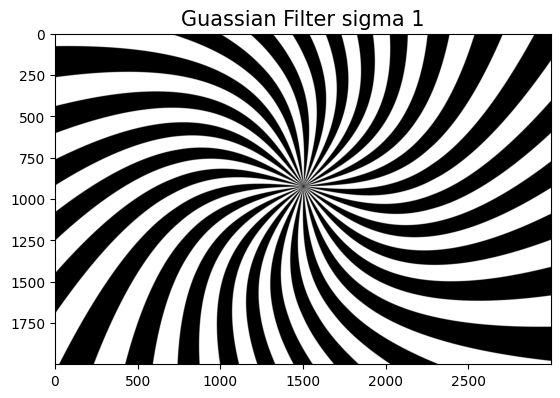

In [9]:
spiralKernelSigma1 = util.img_as_ubyte(filters.gaussian(graySpiral, sigma=1))
plt.imshow(spiralKernelSigma1, cmap='gray')
plt.title ('Guassian Filter sigma 1', fontsize =15)

Text(0.5, 1.0, 'Guassian Filter sigma 5')

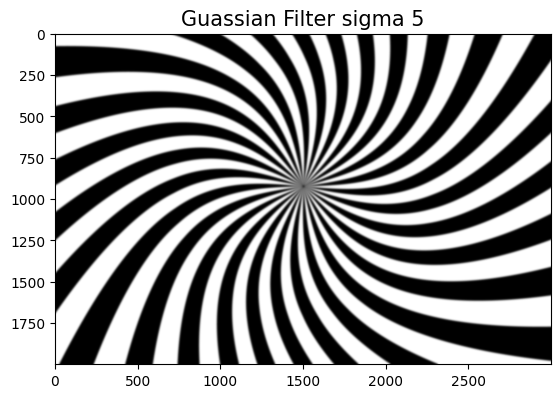

In [10]:
spiralKernelSigma5 = util.img_as_ubyte(filters.gaussian(graySpiral, sigma=5))
plt.imshow(spiralKernelSigma5, cmap='gray')
plt.title ('Guassian Filter sigma 5', fontsize =15)

2.d Terapkan ketiga edge detection yang sudah dilakukan sebelumnya pada citra spiral yang sudah dilakukan gaussian filtering dengan kernel (5, 5)!

Text(0.5, 1.0, 'Guassian Filter Sigma 5 Sobel')

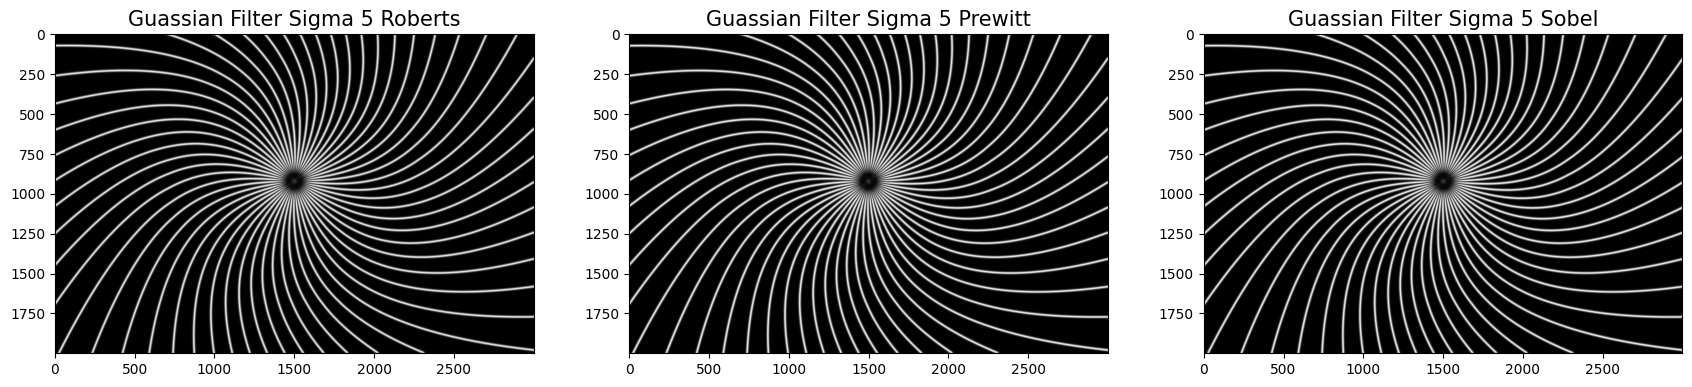

In [11]:
spiral_robert5 = util.img_as_ubyte(filters.roberts(spiralKernelSigma5))
spiral_prewitt5 = util.img_as_ubyte(filters.prewitt(spiralKernelSigma5))
spiral_sobel5 = util.img_as_ubyte(filters.sobel(spiralKernelSigma5))

plt.figure(figsize=(21,14))

plt.subplot(1,3,1); plt.imshow(spiral_robert5, cmap='gray')
plt.title ('Guassian Filter Sigma 5 Roberts', fontsize =15)
plt.subplot(1,3,2); plt.imshow(spiral_prewitt5, cmap='gray')
plt.title ('Guassian Filter Sigma 5 Prewitt', fontsize =15)
plt.subplot(1,3,3); plt.imshow(spiral_sobel5, cmap='gray')
plt.title ('Guassian Filter Sigma 5 Sobel', fontsize =15)

2.e  Apakah ada hasil edge detection sangat mirip? Apa yang paling berbeda? Jika ada yang mirip, coba identifikasi apa yang membuat hal tersebut terjadi. Jika tidak ada yang mirip, apa yang membedakan semuanya?


Edge detection dengan metode roberts memiliki perbedaan dari segi bagaimana perhitungan diagonal pada citra. Metode roberts menggunakan operator 2x2 dimana metode prewitt dengan sobel menggunakan matriks konvolusi 3x3 sehingga sensitifitas terhadap noise lebih berkurang. Meskipun begitu metode prewitt dan sobel pun juga memiliki perbedaan dimana prewitt menggunakan 2 matriks konvolusi 3x3 dimana satu untuk deteksi perubahan horizontal dan satu untuk perubahan vertikal. Metode sobel memiliki sistem yang mirip dengan prewitt disertai dengan penambahan bobot di tengah kernel untuk menekan gradien vertikal dan horizontal. 

Namun dalam kasus di atas, setelah diberikan gaussian filter dengan nilai sigma 5, maka sudah terjadi pengurangan noise yang cukup besar dan kualitas dari gambar yang dibuat lebih lembut. Oleh karena itu ketiga dari metode edge detection di atas mampu menyajikan gambar yang sangat mirip meskipun dengan perbedaan spesifikasi untuk masing-masing metodenya.

Gambar spiral original yang diberikan memiliki guratan yang cukup sulit terlihat karena adanya noise dan juga besar guratan yang semakin memusat ke tengah (mengecil). Ketika dilakukan gaussian filter dengan sigma 5, maka noise gambar yang dihasilkan menjadi lebih besar sehingga guratan yang berada di sekitar noise pada original image awal menjadi tertutupi. Hal tersebut membuat ketika metode edge detection, prewitt, roberts, dan sobel, menghasilkan gambar yang mirip satu dengan yang lainnya. Dikarenakan noise yang cukup besar dan menutupi guratan-guratan yang kecil yang memerlukan presisi lebih untuk mendeteksinya sudah tidak terlihat, maka hasil dari metode roberts mampu menyajikan kualitas gambar yang mirip dengan metode prewitt dan sobel meskipun hasil dari gambar metode roberts kurang mampu memberikan gambaran guratan atau edge sebaik metode sobel dan prewitt ketika terdapat noise yang intensitasnya cukup besar. Perbedaan yang dimiliki oleh metode prewitt dan sobel, sekarang, juga tidak terlihat sehingga menurut saya ketiga edge detection tersebut setelah diberikan gaussian filter dengan sigma 5 menghasilkan kualitas edge detection yang mirip satu dengan yang lainnya

Gambar original yang diubah ke warna abu-abu

Text(0.5, 1.0, 'Gray Image Mike 2')

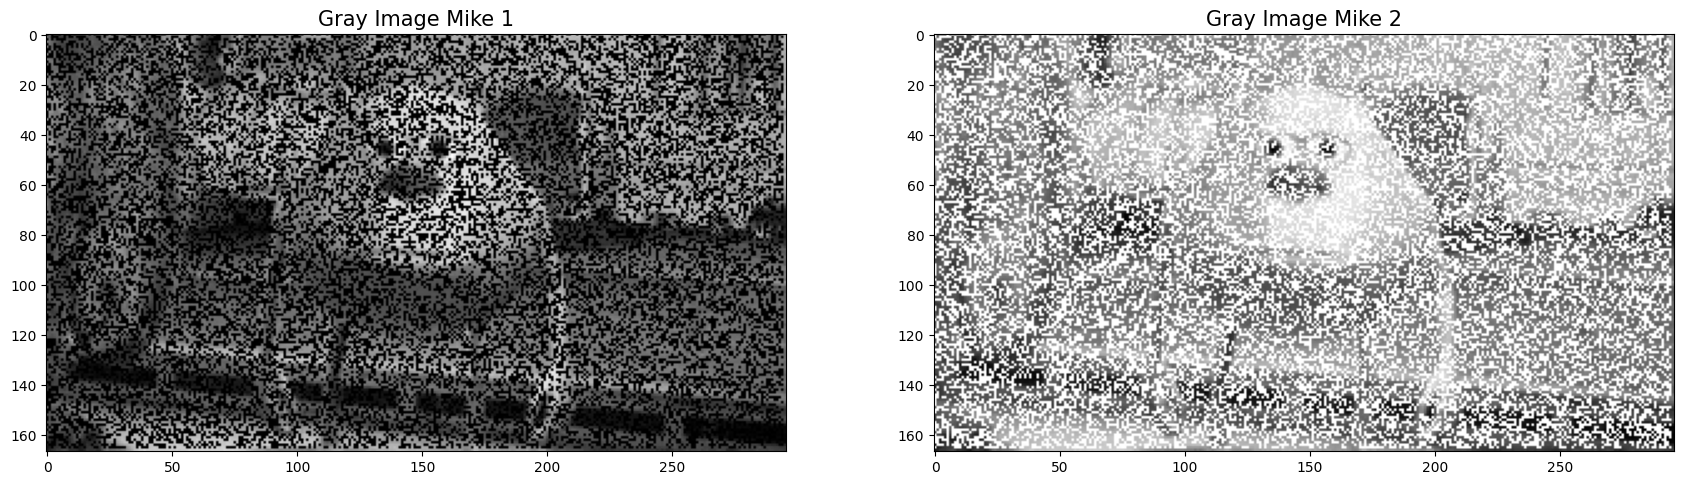

In [17]:
grayNoisyMike1 = color.rgb2gray(io.imread('./noisy_mike_1.jpg'))
grayNoisyMike2 = color.rgb2gray(io.imread('./noisy_mike_2.jpg'))

plt.figure(figsize=(21,14))
plt.subplot(1,2,1); plt.imshow(grayNoisyMike1, cmap='gray')
plt.title ('Gray Image Mike 1', fontsize =15)
plt.subplot(1,2,2); plt.imshow(grayNoisyMike2, cmap='gray')
plt.title ('Gray Image Mike 2', fontsize =15)

3.a Terapkan minimum filter pada kedua citra tersebut dengan ukuran kernel 3x3, kemudian tampilkan perbandingan keduanya

Text(0.5, 1.0, 'Minimum Filter Mike 2')

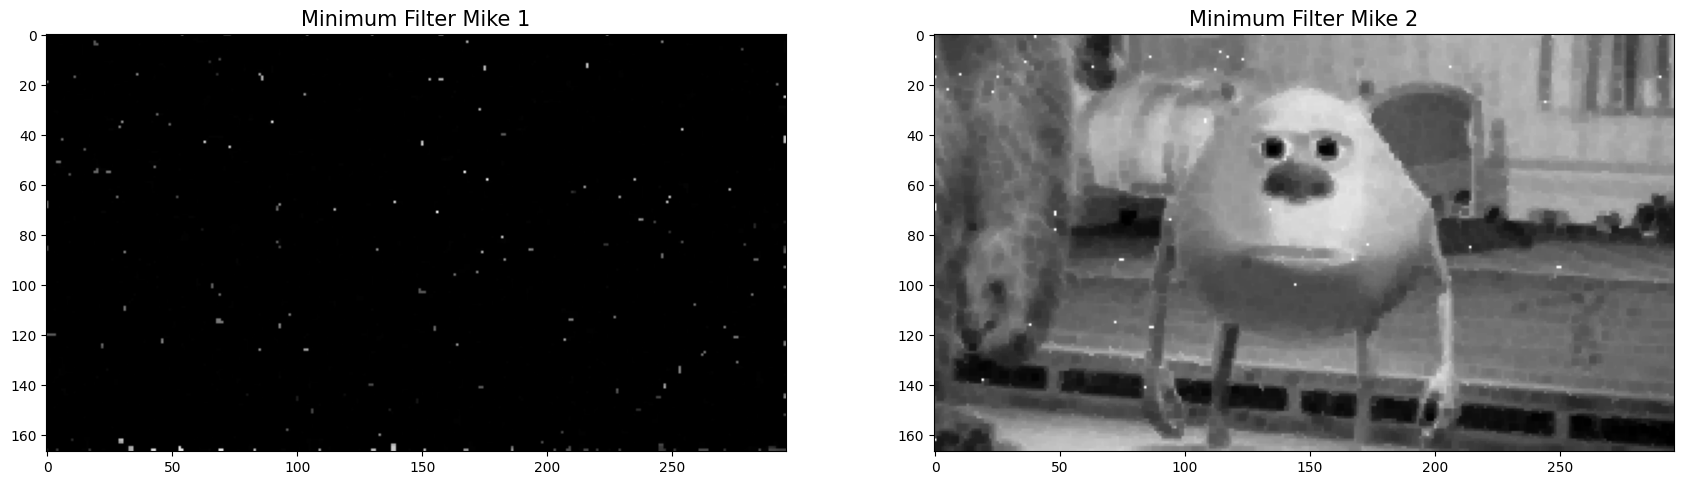

In [16]:
mikeMini1 = filters.rank.minimum(grayNoisyMike1, morphology.square(3))
mikeMini2 = filters.rank.minimum(grayNoisyMike2, morphology.square(3))

plt.figure(figsize=(21,14))
plt.subplot(1,2,1); plt.imshow(mikeMini1, cmap='gray')
plt.title ('Minimum Filter Mike 1', fontsize =15)
plt.subplot(1,2,2); plt.imshow(mikeMini2, cmap='gray')
plt.title ('Minimum Filter Mike 2', fontsize =15)

3.b Terapkan maximum filter pada kedua citra tersebut dengan ukuran kernel 3x3, kemudian tampilkan perbandingan keduanya

Text(0.5, 1.0, 'Maksimum filter Mike 2')

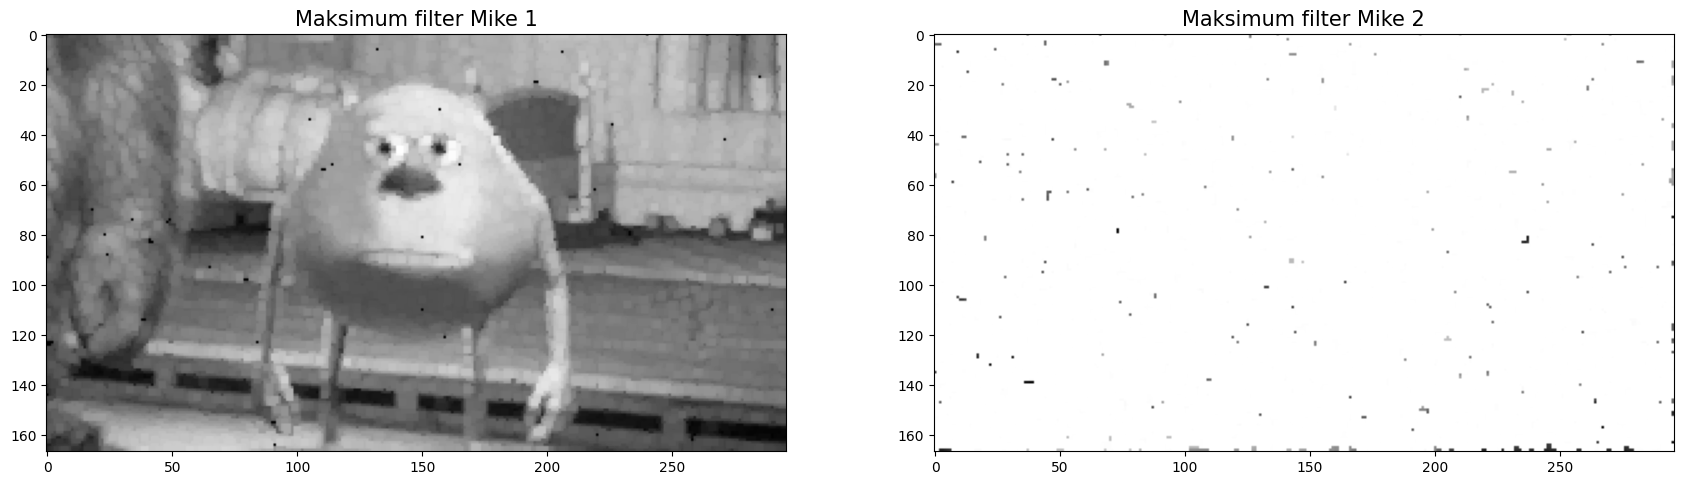

In [15]:
mikeMini1 = filters.rank.maximum(grayNoisyMike1, morphology.square(3))
mikeMini2 = filters.rank.maximum(grayNoisyMike2, morphology.square(3))

plt.figure(figsize=(21,14))
plt.subplot(1,2,1); plt.imshow(mikeMini1, cmap='gray')
plt.title ('Maksimum filter Mike 1', fontsize =15)
plt.subplot(1,2,2); plt.imshow(mikeMini2, cmap='gray')
plt.title ('Maksimum filter Mike 2', fontsize =15)

3.c Apa yang dapat Anda simpulkan dari soal 3a dan 3b? Jelaskan

Operasi minimum filter mengganti nilai piksel pusat pada gambar menjadi nilai paling kecil (minimum) yang dapat ditemukan pada piksel tetangga dalam satu frame tersebut. Hal tersebut membuat gambar noisyMike1 menjadi sangat gelap dan hampir tidak terlihat bentuk apa-apa karena gambar yang awal sudah memiliki banyak titik gelap yang tersebar pada gambar dan titik yang tidak terlalu gelap malah tergantikan dengan yang gelap. Sedangkan untuk gambar noisyMike2 minimum filter yang diberikan malah meningkatkan keterlihatan keselurhan gambar. Hal tersebut dikarenkaan sejak awal cukup banyak titik terang pada gambar sehingga titik-titik tersebut tergantikan dengan nilai minimum tetangganya dan memberikan keselarasan piksel pada keseluruhan gambar.

Operasi maksimum filter mengganti nilai piksel pusat pada gambar menjadi nilai paling besar (maksimum) yang dapat ditemukan pada piksel tetangga dalam satu frame tersebut. Kebalikan dengan yang terjadi pada operasi maksimum filter, gambar noisyMike1 yang memiliki titik-titik gelap yang tersebar dimana nilai dari intensitas tersebut diganti dengan nilai paling besar (maksimal) yang dapat ditemukan pada piksel tetangga dalam satu frame. Hal tersebut membuat gambar noisyMike1 menjadi lebih terlihat jelas karena titik-titik gelap tersebut tergantikan dengan nilai maksimum tetangga yang  kemudian memberikan efek keselarasan piksel pada keseluruhan gambar. Sedangkan untuk gambar noisyMike2, dimana gambar memiliki berbagai titik terang, malah bagian titik yang tidak terlalu terang menjadi sangat terang sehingga tidak terlihat bentuk apapun pada visualisasi gambar yang tersaji.

3.d Menurut pendapat Anda, kapan minimum filter cocok untuk digunakan, kapan maximum filter cocok untuk digunakan? Anda dapat memberikan contoh ilustrasi untuk mendukung penjelasan Anda.

Minimum filter cocok digunakan ketika terdapat berbagai noise berupa titik atau bagain yang intensitas pikselnya terlalu tinggi. Dengan begitu, ketika kita menggunakan minimum filter, noise atau bagian tersebut dapat tergantikan dengan piksel yang mirip dengan tetangga nya dalam gambar tersebut dan menghasilkan konten gambar yang mudah dilihat. Seperti yang terjadi pada gambar noisyMike2 di soal 3a. Sedangkan maksimum filter cocok digunakan ketika terdapat berbagai noise berupa titik atau bagian yang intensitas pikselnya terlalu rendah. Dengan begitu maksimum filter dapat membantu menggantikan noise atau bagian tersebut dengan piksel yang serupa dengan tetangga dalam gambar dan menghasilkan gambar yang isinya dapat terlihat lebih jelas.